In [1]:
from UQpy.surrogates import Kriging
from UQpy.utilities.strata import Rectangular
from UQpy.sampling import StratifiedSampling, MonteCarloSampling
from UQpy.RunModel import RunModel
from UQpy.distributions import Uniform
import numpy as np
import matplotlib.pyplot as plt

In [2]:
marginals = [Uniform()]

In [3]:
strata = Rectangular(strata_number=[10])

In [4]:
x = StratifiedSampling(distributions=marginals, strata_object=strata,
                       samples_per_stratum_number=1, random_state=2)

In [5]:
def func(x):
    return 1/(1+(10*x)**4)+0.5*np.exp(-100*(x-0.5)**2)

In [6]:
samples = x.samples.copy()
output = np.zeros([x.samples.shape[0], 1])
for j in range(x.samples.shape[0]):
    output[j, 0] = func(x.samples[j, 0])

In [7]:
from UQpy.surrogates.kriging.regression_models import Linear
from UQpy.surrogates.kriging.correlation_models import Gaussian
K = Kriging(regression_model=Linear(), correlation_model=Gaussian(),
            optimizations_number=20, correlation_model_parameters=[1], random_state=2, bounds=[[0.1, 10]])
K.fit(samples=samples, values=output)
print(K.correlation_model_parameters)

{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]]}
{'method': 'L-BFGS-B', 'jac': True, 'bounds': [[0.1, 10]

In [8]:
num = 1000
x1 = np.linspace(min(x.samples), max(x.samples), num)

y, y_sd = K.predict(x1.reshape([num, 1]), return_std=True)
y_grad = K.jacobian(x1.reshape([num, 1]))

y_act = np.zeros([num, 1])
for i in range(num):
    y_act[i, 0] = func(x1[i, 0])

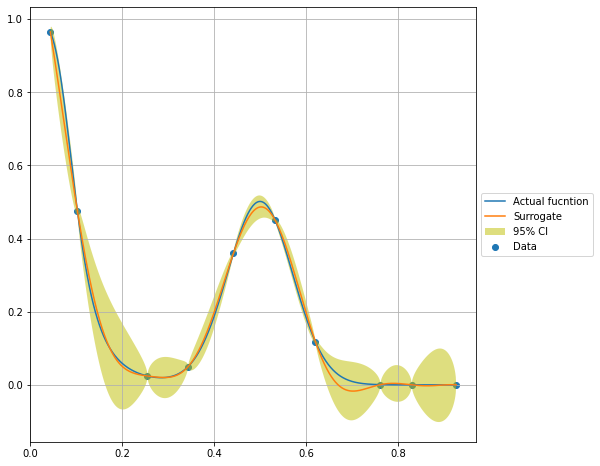

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
plt.plot(x1, y_act, label='Actual fucntion')
plt.plot(x1, y, label='Surrogate')
# plt.plot(x1, y_grad, label='Gradient')
plt.scatter(K.samples, K.values, label='Data')
plt.fill(np.concatenate([x1, x1[::-1]]), np.concatenate([y - 1.9600 * y_sd,
                                                         (y + 1.9600 * y_sd)[::-1]]),
         alpha=.5, fc='y', ec='None', label='95% CI')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

In [10]:
from UQpy.surrogates.kriging.constraints import Nonnegative
mcs = MonteCarloSampling(distributions=marginals, samples_number=30, random_state=20)
nonnegative = Nonnegative(candidate_points=mcs.samples)

In [11]:
K1 = Kriging(regression_model=Linear(), correlation_model=Gaussian(), optimize_constraints=nonnegative,
             optimizations_number=20, correlation_model_parameters=[1], random_state=2, bounds=[[0.1, 10]],
             optimizer='Newton-CG')
K1.fit(samples=samples, values=output)
print(K1.correlation_model_parameters)

{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
{'method': 'Newton-CG', 'jac': True}
[3.68009417]


/Users/mj/Documents/UQpy/src/UQpy/surrogates/kriging/Kriging.py:192: UserWarning: UQpy: Scipy optimize method doesn't support constraints. Thus ignoring constraints.
  warnings.warn("UQpy: Scipy optimize method doesn't support constraints. Thus ignoring constraints.")


In [12]:
y1, y1_sd = K1.predict(x1.reshape([num, 1]), return_std=True)
y1_grad = K1.jacobian(x1.reshape([num, 1]))

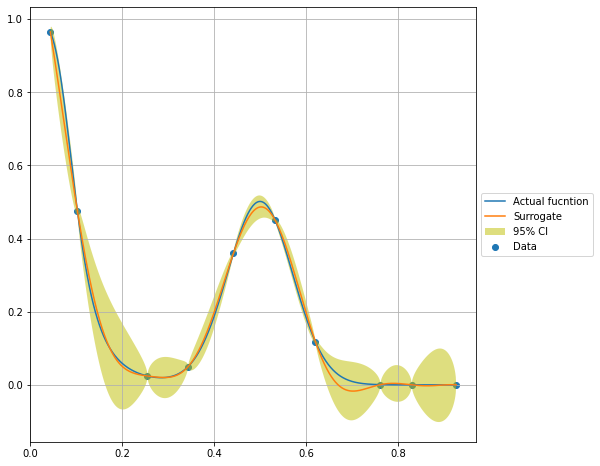

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
plt.plot(x1, y_act, label='Actual fucntion')
plt.plot(x1, y1, label='Surrogate')
# plt.plot(x1, y1_grad, label='Gradient')
plt.scatter(K1.samples, K1.values, label='Data')
plt.fill(np.concatenate([x1, x1[::-1]]), np.concatenate([y1 - 1.9600 * y1_sd,
                                                         (y1 + 1.9600 * y1_sd)[::-1]]),
         alpha=.5, fc='y', ec='None', label='95% CI')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

In [14]:
K2 = Kriging(regression_model=Linear(), correlation_model=Gaussian(), optimize_constraints=nonnegative,
             optimizations_number=20, correlation_model_parameters=[1], random_state=2, bounds=[[0.01, 10]],
             optimizer='COBYLA')
K2.fit(samples=samples, values=output)
print(K2.correlation_model_parameters)

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

{'method': 'COBYLA', 'jac': False, 'constraints': [{'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.5881308]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89771373]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.89153073]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.constraints_candidate at 0x7fae49ead1f0>, 'args': (<bound method Kriging.predict of <UQpy.surrogates.kriging.Kriging.Kriging object at 0x7fae4a84dbb0>>, array([0.81583748]), 2)}, {'type': 'ineq', 'fun': <function Nonnegative.cons

In [15]:
y2, y2_sd = K2.predict(x1.reshape([num, 1]), return_std=True)
y2_grad = K2.jacobian(x1.reshape([num, 1]))

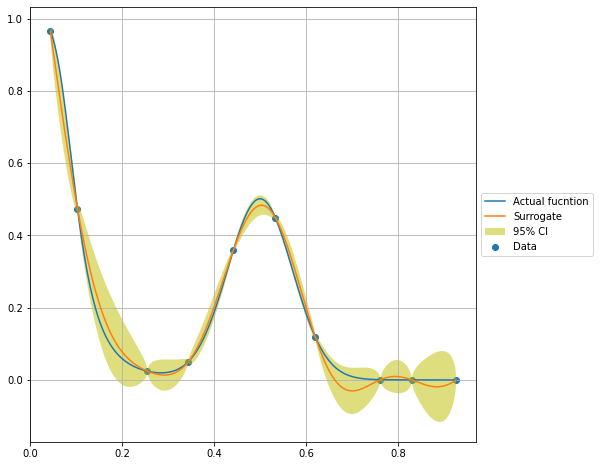

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
plt.plot(x1, y_act, label='Actual fucntion')
plt.plot(x1, y2, label='Surrogate')
# plt.plot(x1, y2_grad, label='Gradient')
plt.scatter(K2.samples, K2.values, label='Data')
plt.fill(np.concatenate([x1, x1[::-1]]), np.concatenate([y2 - 1.9600 * y2_sd,
                                                         (y2 + 1.9600 * y2_sd)[::-1]]),
         alpha=.5, fc='y', ec='None', label='95% CI')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

In [17]:
for i in range(mcs.samples.shape[0]):
    tmp2, tmp2_sd = K2.predict(mcs.samples[i,:].reshape(-1, 1), return_std=True)
    print(tmp2 - 2*tmp2_sd)

[0.21931456]
[-0.11618136]
[-0.11830182]
[-0.03339881]
[0.96561994]
[-0.09372052]
[0.0972005]
[0.45387]
[-0.04183165]
[-0.00907927]
[-0.02055318]
[-0.08667541]
[-0.03264495]
[-0.06924024]
[-0.02768546]
[0.96283302]
[0.31980891]
[-0.0377669]
[-0.01042888]
[0.0203326]
[-0.08389418]
[-0.13007955]
[0.33225157]
[0.01492629]
[-0.02290057]
[0.44994554]
[0.05426679]
[-0.04312934]
[0.39736431]
[0.45404421]
